In [2]:
!pip3  install  mysql-connector-python

     |████████████████████████████████| 8.9 MB 8.3 MB/s eta 0:00:01
     |████████████████████████████████| 982 kB 35.4 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [151]:
# us e-commerce 2020 records data load
df = pd.read_csv("/Users/yeonjae/kaggle/US  E-commerce records 2020.csv")
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [32]:
df['Order Date'].describe()

<ipython-input-32-1c547f440e69>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['Order Date'].describe()


count                    3312
unique                    322
top       2020-02-09 00:00:00
freq                       36
first     2020-01-01 00:00:00
last      2020-12-30 00:00:00
Name: Order Date, dtype: object

In [156]:
df[-1:]

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3311,30-12-20,5092,CA-2017-156720,Standard Class,JM-15580,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048


In [167]:
# 월 컬럼 추가 (datetime 라이브러리 이상함)
df['Month'] = df['Order Date'].str.split('-').str[1].astype(int)

### EDA

In [371]:
# 고객 segment 분석
# 매출의 가장 많은 고객층 : Consumer
df[['Segment', 'Order ID', 'Sales']].groupby(['Segment'])['Sales'].sum()

Segment
Consumer       331904.6999
Corporate      241847.8244
Home Office    159462.7309
Name: Sales, dtype: float64

In [169]:
df[['Month', 'Sales']].groupby('Month').sum().sort_values(by='Sales')

,Sales
Month,
2,20301.1334
4,36521.5361
1,43971.3740
5,44261.1102
7,45264.4160
6,52981.7257
3,58872.3528
8,63120.8880
10,77776.9232


In [370]:
# 12 월에 
consumer[['Month', 'Sales']].groupby('Month').sum().sort_values(by='Sales')

,Sales
Month,
2,5589.0770
4,9034.9240
7,18991.3730
6,20273.1177
5,21059.7374
10,23194.2402
1,23211.8410
8,31629.1440
3,35041.5220


In [170]:
df[['Segment', 'Sales']].groupby('Segment').sum()

,Sales
Segment,
Consumer,331904.6999
Corporate,241847.8244
Home Office,159462.7309


<AxesSubplot:xlabel='Segment'>

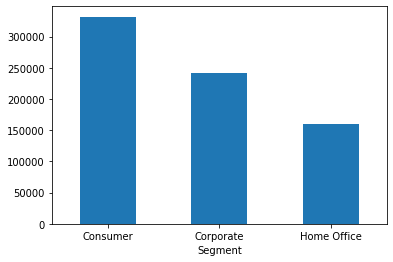

In [171]:
segment = df.groupby('Segment')['Sales'].sum()
segment.plot.bar(rot=0)

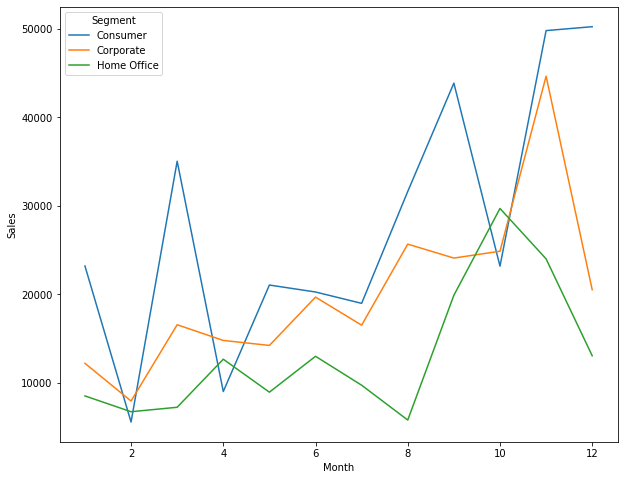

In [173]:
month_segment = df[['Segment', 'Month', 'Sales']].groupby(['Segment', 'Month']).sum()
plt.figure(figsize=(10, 8))
sns.lineplot(x='Month', y='Sales', data=month_segment, hue='Segment')
plt.show()

In [174]:
consumer = df[df['Segment']=='Consumer']

In [176]:
consumer.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,1
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,1
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,1
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,1
5,01-01-20,8072,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-CH-10003199,Furniture,Chairs,Office Star - Contemporary Task Swivel Chair,310.744,4,0.3,-26.6352,1


<ipython-input-177-249095ad7f92>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=category_sale, x='Month', y='Sales', hue='Category', ci=None)


<AxesSubplot:xlabel='Month', ylabel='Sales'>

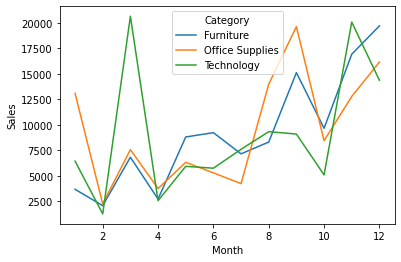

In [177]:
# 카테고리별 월별 매출액
category_sale = consumer[['Month', 'Category', 'Sales']].groupby(['Month', 'Category']).sum()
sns.lineplot(data=category_sale, x='Month', y='Sales', hue='Category', ci=None)

In [402]:
category_sale = consumer.groupby(['Month', 'Category'])['Sales'].sum().reset_index()
category_sale[category_sale['Month'].isin([9, 11, 12])].groupby('Category').sum('Sales').reset_index().sort_values(by='Sales', ascending=False)

,Category,Month,Sales
0,Furniture,32,51755.2466
1,Office Supplies,32,48574.5900
2,Technology,32,43549.8870


In [178]:
# 건당 매출액
consumer.groupby(['Category'])['Sales'].mean()

Category
Furniture          313.117977
Office Supplies    111.185362
Technology         366.667515
Name: Sales, dtype: float64

In [179]:
consumer.groupby(['Category'])['Order ID'].count()

Category
Furniture           352
Office Supplies    1021
Technology          295
Name: Order ID, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='count'>

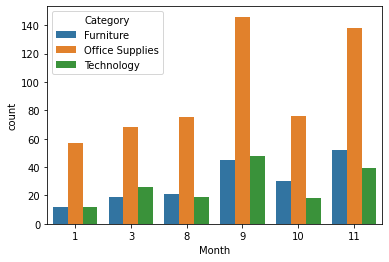

In [180]:
# 매출 상위 6 월 카테고리별 주문건수
label = [1, 3, 8, 9, 10, 11]
sns.countplot(data=consumer[consumer['Month'].isin(label)], x='Month', hue='Category')

<ipython-input-181-6c35c6617559>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=month_category_sales, x='Month', y='Sales', hue='Category', ci=None)


<AxesSubplot:xlabel='Month', ylabel='Sales'>

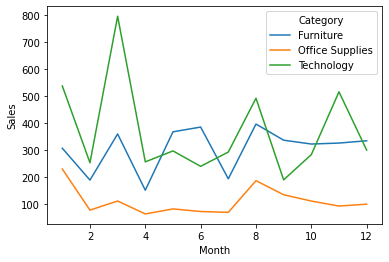

In [181]:
# 카테고리별 월별 평균매출액
month_category_sales = consumer[['Category', 'Month', 'Sales']].groupby(['Category', 'Month']).mean()
sns.lineplot(data=month_category_sales, x='Month', y='Sales', hue='Category', ci=None)

<ipython-input-389-ef4279bbac7c>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=category_sale, x='Month', y='Sales',ci=None)


<AxesSubplot:xlabel='Month', ylabel='Sales'>

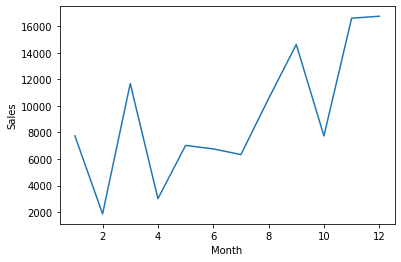

In [389]:
sns.lineplot(data=category_sale, x='Month', y='Sales',ci=None)

In [390]:
category_sale

Sales
Month Category                   
1     Furniture         3676.9700
      Office Supplies  13093.0430
      Technology        6441.8280
2     Furniture         2075.0100
      Office Supplies   2250.4830
      Technology        1263.5840
3     Furniture         6822.9340
      Office Supplies   7567.3560
      Technology       20651.2320
4     Furniture         2721.1340
      Office Supplies   3753.4200
      Technology        2560.3700
5     Furniture         8809.6754
      Office Supplies   6321.0520
      Technology        5929.0100
6     Furniture         9231.1817
      Office Supplies   5293.7140
      Technology        5748.2220
7     Furniture         7156.4790
      Office Supplies   4233.5700
      Technology        7601.3240
8     Furniture         8310.8360
      Office Supplies  13987.1860
      Technology        9331.1220
9     Furniture        15124.9150
      Office Supplies  19636.0570
      Technology        9096.2310
10    Furniture         9658.0612
      Office Supplies   8445.8410
      Technology        5090.3380
11    Furniture        16925.4788
      Office Supplies  12784.5460
      Technology       20080.0400
12    Furniture        19704.8528
      Office Supplies  16153.9870
      Technology       14373.6160

In [369]:
month_category_sales.groupby('Month')['Sales'].sum().

Month
1     1072.935675
2      518.956935
3     1264.664590
4      470.828399
5      745.611893
6      696.658451
7      555.179754
8     1073.361593
9      660.107576
10     715.861416
11     933.004435
12     733.146858
Name: Sales, dtype: float64

### 대충 분석

In [ ]:
# 건 당 평균 결제 금액이 높은 Technology
# Technology 구매 고객을 늘리기

In [243]:
# consumer 고객별 매출액
consumer[['Sales', 'Customer ID']].groupby('Customer ID').sum().sort_values(by='Sales', ascending=False)[:72]

,Sales
Customer ID,
RB-19360,14203.278
HL-15040,10522.550
SV-20365,8459.936
PK-19075,5979.136
AR-10540,5820.580
...,...
PJ-19015,1432.586
MG-18145,1415.606
JF-15190,1372.062


In [ ]:
# 매출 상위 80%의 고객들

In [195]:
tech = df[(df['Category']=='Technology') & (df['Segment']=='Consumer')]
tech.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month
39,14-01-20,1184,CA-2017-138779,First Class,RB-19570,Consumer,United States,Jacksonville,North Carolina,28540,South,TEC-PH-10003655,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,7.920,5,0.2,0.6930,1
44,14-01-20,4912,CA-2017-127306,Standard Class,BH-11710,Consumer,United States,Johnson City,Tennessee,37604,South,TEC-PH-10001924,Technology,Phones,iHome FM Clock Radio with Lightning Dock,111.984,2,0.2,6.9990,1
61,15-01-20,6385,US-2017-104661,First Class,TB-21250,Consumer,United States,Austin,Texas,78745,Central,TEC-AC-10003628,Technology,Accessories,Logitech 910-002974 M325 Wireless Mouse for We...,47.984,2,0.2,14.3952,1
62,15-01-20,6386,US-2017-104661,First Class,TB-21250,Consumer,United States,Austin,Texas,78745,Central,TEC-AC-10002331,Technology,Accessories,"Maxell 74 Minute CDR, 10/Pack",62.592,8,0.2,13.3008,1
70,19-01-20,9116,CA-2017-153045,Second Class,NS-18505,Consumer,United States,Philadelphia,Pennsylvania,19140,East,TEC-PH-10001817,Technology,Phones,Wilson Electronics DB Pro Signal Booster,429.600,2,0.4,-93.0800,1


In [201]:
tech.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Month
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,5065.708475,54750.488136,366.667515,3.867797,0.132203,87.804974,7.915254
std,2858.303240,32005.070074,1086.741880,2.411596,0.134570,497.036680,3.256016
min,87.000000,1852.000000,1.584000,1.000000,0.000000,-377.989200,1.000000
25%,2416.500000,22008.000000,64.975000,2.000000,0.000000,5.998000,6.000000
50%,5385.000000,55901.000000,132.520000,3.000000,0.200000,21.792000,9.000000
75%,7496.500000,89559.500000,369.352000,5.000000,0.200000,53.175150,11.000000
max,9992.000000,98115.000000,13999.960000,14.000000,0.700000,6719.980800,12.000000


In [237]:
# Sub Category
# Phones 매출이 가장 높음
tech.groupby(['Sub-Category'])['Sales'].sum()

Sub-Category
Accessories    22946.464
Copiers        29919.798
Machines        3777.677
Phones         51522.978
Name: Sales, dtype: float64

In [ ]:
# 할인률 20 프로 일때 가장 많이 구매, profit 도 가장 높음

In [202]:
tech['Brand'] = tech['Product Name'].str.split(' ').str[0]

<ipython-input-202-68b93e9bd292>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech['Brand'] = tech['Product Name'].str.split(' ').str[0]


In [222]:
brand_cnt = tech[['Brand', 'Order ID']].groupby('Brand').count()
brand_cnt

,Order ID
Brand,
3D,1
AT&T,4
Aastra,4
Adtran,1
AmazonBasics,1
...,...
Wilson,2
iHome,2
iOttie,3


In [410]:
brand_cnt = fur[['Sub-Category', 'Order ID']].groupby('Sub-Category').count()
brand_cnt.sort_values(by='Order ID', ascending=False)

,Order ID
Sub-Category,
Furnishings,161
Chairs,98
Bookcases,48
Tables,45


In [ ]:
tech2 = tech[tech['Sub-Category']=='Phones']

In [234]:
tech2[['Brand', 'Order ID']].groupby('Brand').count().sort_values(by='Order ID', ascending=False)[:10]

,Order ID
Brand,
Panasonic,10
Samsung,8
GE,7
Cisco,7
Nortel,5
Jabra,5
Motorola,5
Nokia,4
Aastra,4


In [231]:
tech2[['Brand', 'Order ID', 'Sales']].groupby('Brand').sum('Sales').sort_values(by='Sales', ascending=False)[:10]

,Sales
Brand,
Samsung,13256.894
GE,3139.800
Panasonic,3018.946
ClearOne,2479.960
Aastra,2316.298
Polycom,2142.956
Nortel,1994.578
Apple,1983.648
Jabra,1968.260


In [216]:
# Canon : 복사기
tech[['Brand', 'Order ID', 'Sales']].groupby('Brand').sum('Sales').sort_values(by='Sales', ascending=False)[:10]

,Sales
Brand,
Canon,27459.864
Samsung,13256.894
Logitech,5307.406
Plantronics,3797.376
GE,3139.800
Panasonic,3018.946
Razer,2567.844
ClearOne,2479.960
Aastra,2316.298


In [242]:
# 선호하는 브랜드 삼성, 로지텍, 플랜트로닉스
Phone_Acc = tech[tech['Sub-Category'].isin(['Phones', 'Accessories'])]
Phone_Acc[['Brand', 'Sales']].groupby('Brand').sum('Sales').sort_values(by='Sales', ascending=False)[:10]

,Sales
Brand,
Samsung,13256.894
Logitech,5307.406
Plantronics,3797.376
GE,3139.800
Panasonic,3018.946
Razer,2567.844
ClearOne,2479.960
Aastra,2316.298
Polycom,2142.956


In [217]:
tech[tech['Brand']=='Canon'][['Brand', 'Sales', 'Order ID', 'Product Name']]

,Brand,Sales,Order ID,Product Name
427,Canon,13999.960,CA-2017-140151,Canon imageCLASS 2200 Advanced Copier
1317,Canon,599.970,US-2017-165358,Canon PC-428 Personal Copier
2439,Canon,959.984,CA-2017-100622,Canon Image Class D660 Copier
2644,Canon,10499.970,CA-2017-166709,Canon imageCLASS 2200 Advanced Copier
3045,Canon,1399.980,US-2017-167920,Canon Imageclass D680 Copier / Fax


In [459]:
brand_sale = tech[['Brand', 'Sales']].groupby('Brand').sum('Sales').sort_values(by='Sales', ascending=False)
brand_sale

,Sales
Brand,
Canon,27459.864
Samsung,13256.894
Logitech,5307.406
Plantronics,3797.376
GE,3139.800
...,...
Sabrent,20.370
AmazonBasics,16.776
Cush,14.850


In [458]:
fur[['Brand', 'Sales']].groupby('Brand').sum('Sales').sort_values(by='Sales', ascending=False)


,Sales
Brand,
Global,21648.6060
Hon,15823.4670
Bush,8488.2223
HON,7220.0940
O'Sullivan,6134.2392
...,...
Dana,17.0880
Telescoping,15.9920
Regeneration,8.8000


pd.crosstab(tech['Brand'], tech['Customer ID'], normalize='Index')

In [454]:
fur[['Discount', 'Order ID', 'Profit'cb
    ]].groupby('Discount').count().sort_values(by='Order ID', ascending=False)

,Order ID,Profit
Discount,,
0.00,134,134
0.20,109,109
0.30,39,39
0.60,22,22
0.10,13,13
0.15,9,9
0.50,8,8
0.40,7,7
0.32,6,6


In [457]:
fur[['Discount', 'Profit']].groupby('Discount').mean().sort_values(by='Profit', ascending=False)

,Profit
Discount,
0.10,126.041446
0.00,57.316219
0.15,10.207189
0.20,5.968207
0.32,-41.733567
0.60,-42.341714
0.30,-59.257418
0.50,-191.390575
0.40,-220.663471


In [ ]:
rfm

In [255]:
# 상위 20% 
top20_list = tech.groupby('Customer ID').sum('Sales').reset_index().sort_values(by='Sales', ascending=False)[:38]['Customer ID']
top20_list

152    RB-19360
74     HL-15040
145    PO-18850
99     JL-15835
13     BD-11500
95     JK-16090
175    SV-20365
118    LP-17095
34     CM-12115
76     IL-15100
107    KH-16510
1      AB-10105
144    PJ-19015
125    MG-18145
27     CD-11920
160    RL-19615
31     CK-12205
154    RD-19480
176    SV-20935
47     DK-13090
113    LC-17140
57     EJ-13720
23     CC-12220
135    ND-18370
52     DV-13465
110    KM-16720
131    MN-17935
39     CS-12355
61     FH-14350
165    SC-20380
103    JR-15700
162    RW-19690
186    TP-21130
49     DM-13015
138    NR-18550
98     JL-15505
97     JL-15235
46     DK-12895
Name: Customer ID, dtype: object

In [258]:
top20 = tech[tech['Customer ID'].isin(top20_list)]
top20

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Brand
120,26-01-20,8313,US-2017-105935,Standard Class,BD-11500,Consumer,United States,Columbus,Georgia,31907,...,TEC-PH-10001459,Technology,Phones,Samsung Galaxy Mega 6.3,2939.930,7,0.0,764.3818,1,Samsung
152,30-01-20,8270,CA-2017-121790,Standard Class,LP-17095,Consumer,United States,Aurora,Illinois,60505,...,TEC-PH-10002584,Technology,Phones,Samsung Galaxy S4,2003.168,4,0.2,250.3960,1,Samsung
196,13-02-20,2731,CA-2017-104801,Standard Class,FH-14350,Consumer,United States,Seattle,Washington,98105,...,TEC-AC-10001838,Technology,Accessories,Razer Tiamat Over Ear 7.1 Surround Sound PC Ga...,799.960,4,0.0,343.9828,2,Razer
241,21-02-20,9318,CA-2017-124940,Standard Class,DK-13090,Consumer,United States,Carrollton,Texas,75007,...,TEC-AC-10002076,Technology,Accessories,Microsoft Natural Keyboard Elite,47.904,1,0.2,-2.9940,2,Microsoft
277,03-03-20,6576,CA-2017-123085,Standard Class,EJ-13720,Consumer,United States,Los Angeles,California,90008,...,TEC-AC-10000990,Technology,Accessories,Imation Bio 2GB USB�Flash Drive Imation�Corp,1049.440,8,0.0,440.7648,3,Imation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,22-12-20,2056,CA-2017-120376,First Class,TP-21130,Consumer,United States,Detroit,Michigan,48227,...,TEC-AC-10001114,Technology,Accessories,Microsoft Wireless Mobile Mouse 4000,199.950,5,0.0,63.9840,12,Microsoft
3191,22-12-20,2058,CA-2017-120376,First Class,TP-21130,Consumer,United States,Detroit,Michigan,48227,...,TEC-AC-10000844,Technology,Accessories,Logitech�Gaming G510s - Keyboard,84.990,1,0.0,30.5964,12,Logitech�Gaming
3206,22-12-20,8178,CA-2017-149699,First Class,CM-12115,Consumer,United States,Los Angeles,California,90008,...,TEC-AC-10000474,Technology,Accessories,Kensington Expert Mouse Optical USB Trackball ...,474.950,5,0.0,142.4850,12,Kensington
3235,24-12-20,4030,CA-2017-124296,Standard Class,CS-12355,Consumer,United States,Lafayette,Louisiana,70506,...,TEC-MA-10003183,Technology,Machines,DYMO CardScan Personal V9 Business Card Scanner,479.970,3,0.0,239.9850,12,DYMO


In [267]:
# 20% 사람이 매출 약 70% 차지
top20['Sales'].sum() / tech['Sales'].sum() * 100

68.74750437788663

In [272]:
top20['Order Date2'] = pd.to_datetime(top20['Order Date'], format='%d-%m-%y')
top20['Order Date2']

<ipython-input-272-ef832b2dc3ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20['Order Date2'] = pd.to_datetime(top20['Order Date'], format='%d-%m-%y')


120    2020-01-26
152    2020-01-30
196    2020-02-13
241    2020-02-21
277    2020-03-03
          ...    
3189   2020-12-22
3191   2020-12-22
3206   2020-12-22
3235   2020-12-24
3249   2020-12-25
Name: Order Date2, Length: 89, dtype: datetime64[ns]

In [284]:
last_order = top20[['Customer ID', 'Order Date2']].groupby('Customer ID').max('Order Date2')

,Order Date2
Customer ID,
AB-10105,2020-09-19
BD-11500,2020-01-26
CC-12220,2020-11-16
CD-11920,2020-11-20
CK-12205,2020-11-21
CM-12115,2020-12-22
CS-12355,2020-12-24
DK-12895,2020-08-12
DK-13090,2020-11-18


In [305]:
# RFM
id_list = tech['Customer ID'].drop_duplicates()
rfm = pd.DataFrame({'Customer ID': id_list})
rfm

,Customer ID
39,RB-19570
44,BH-11710
61,TB-21250
70,NS-18505
79,TH-21100
...,...
3119,KM-16660
3148,RA-19915
3182,BD-11635
3198,SK-19990


In [307]:
cutomer_sale

,Customer ID,Sales
152,RB-19360,14119.920
74,HL-15040,10499.970
145,PO-18850,4367.896
99,JL-15835,3659.956
13,BD-11500,2939.930
...,...,...
72,HA-14920,14.200
104,JW-15955,11.540
68,GT-14710,7.992
149,RA-19285,5.560


<AxesSubplot:>

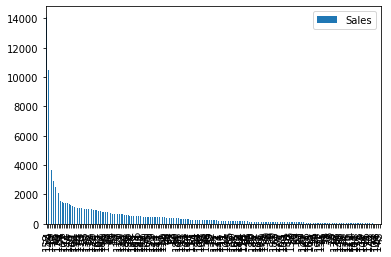

In [289]:
# Monetary : 1000 달러 이상 구매 VIP
cutomer_sale = tech.groupby('Customer ID')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
cutomer_sale.plot.bar()

In [291]:
# recency
tech['Order Date2'] = pd.to_datetime(tech['Order Date'], format='%d-%m-%y')

<ipython-input-291-6be93fd991cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech['Order Date2'] = pd.to_datetime(tech['Order Date'], format='%d-%m-%y')


In [414]:
# recency
fur['Order Date2'] = pd.to_datetime(fur['Order Date'], format='%d-%m-%y')

<ipython-input-414-0668ad25a2b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fur['Order Date2'] = pd.to_datetime(fur['Order Date'], format='%d-%m-%y')


<AxesSubplot:xlabel='Month', ylabel='count'>

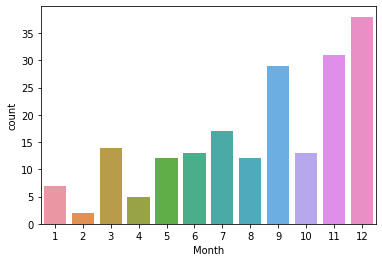

In [299]:
# recency : (마지막 구매 월) 최근 2개월 이내
last_order_month = tech[['Customer ID', 'Month']].groupby('Customer ID').max('Month')
sns.countplot(last_order_month, x='Month')

In [304]:
last_order_month.reset_index()

,Customer ID,Month
0,AA-10375,12
1,AB-10105,9
2,AB-10150,9
3,AG-10330,12
4,AG-10675,9
...,...,...
188,TR-21325,6
189,TS-21505,11
190,TT-21220,3
191,WB-21850,6


<AxesSubplot:xlabel='Customer ID', ylabel='count'>

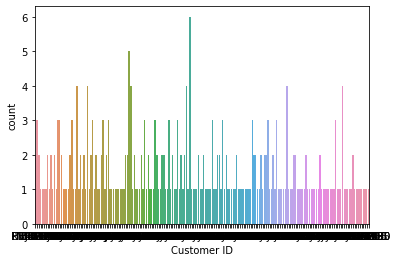

In [300]:
# Freqeuncy : 2번 이상 high
sns.countplot(tech, x='Customer ID')

<AxesSubplot:xlabel='Customer ID', ylabel='count'>

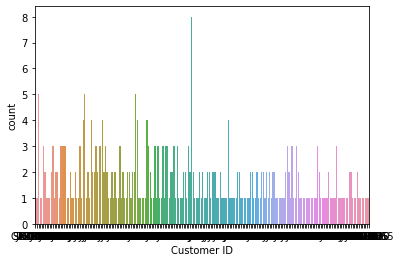

In [418]:
# Freqeuncy : 3번 이상 high
sns.countplot(fur, x='Customer ID')

In [314]:
cnt = tech.groupby(['Customer ID'])['Order ID'].count().reset_index()
rfm = pd.merge(left = rfm , right = cnt, how = "inner", on = "Customer ID")

In [329]:
rfm['Recency'] = rfm['Month'].apply(lambda x : "high" if x > 10 else "low")

In [330]:
def frequency(x):
    if x > 1:
        return "high"
    else: return "low"
rfm['Frequency'] = rfm['Order ID'].apply(lambda x: frequency(x))

In [331]:
rfm['Monetary'] = rfm['Sales'].apply(lambda x: "high" if x>=1000 else "low")

In [334]:
rfm['rfm'] = None
rfm

,Customer ID,Sales,Month,Order ID,Recency,Frequency,Monetary,rfm
0,RB-19570,107.310,12,2,high,high,low,None
1,BH-11710,200.032,12,3,high,high,low,None
2,TB-21250,110.576,1,2,low,high,low,None
3,NS-18505,429.600,1,1,low,low,low,None
4,TH-21100,160.776,1,1,low,low,low,None
...,...,...,...,...,...,...,...,...
188,KM-16660,196.776,12,1,high,low,low,None
189,RA-19915,119.980,12,1,high,low,low,None
190,BD-11635,71.000,12,1,high,low,low,None
191,SK-19990,629.958,12,1,high,low,low,None


In [355]:
vip_index= rfm[(rfm['Recency']=='high') & (rfm['Frequency']=='high') & (rfm['Monetary']=='high')].index

In [358]:
rfm.iloc[vip_index, 7] = 'VIP'

In [375]:
vip_list = rfm.iloc[vip_index,0]

In [377]:
# vip 는 악세서리 가장 많이 구매
tech[tech['Customer ID'].isin(vip_list)].groupby(['Sub-Category'])['Order ID'].count()

Sub-Category
Accessories    13
Copiers         3
Machines        2
Phones          8
Name: Order ID, dtype: int64

In [382]:
# 떠나간 VIP: accecaries&Phone 제일 많이 구매
gone_vip_list= rfm[(rfm['Recency']=='low') & (rfm['Frequency']=='high') & (rfm['Monetary']=='high')]['Customer ID']
tech[tech['Customer ID'].isin(gone_vip_list)].groupby(['Sub-Category'])['Order ID'].count()

Sub-Category
Accessories    10
Copiers         2
Phones         11
Name: Order ID, dtype: int64

In [381]:
# 잠재 VIP 고객 : accecaries&phones 를 가장 많이 구매 
pos_vip_list= rfm[(rfm['Recency']=='high') & (rfm['Frequency']=='high') & (rfm['Monetary']=='low')]['Customer ID']
tech[tech['Customer ID'].isin(pos_vip_list)].groupby(['Sub-Category'])['Order ID'].count()

Sub-Category
Accessories    28
Machines        1
Phones         26
Name: Order ID, dtype: int64

In [383]:
# new (신규고객)
new_list= rfm[(rfm['Recency']=='high') & (rfm['Frequency']=='low') & (rfm['Monetary']=='low')]['Customer ID']
tech[tech['Customer ID'].isin(new_list)].groupby(['Sub-Category'])['Order ID'].count()

Sub-Category
Accessories    15
Machines        2
Phones         19
Name: Order ID, dtype: int64

In [384]:
# 이탈 고객: 가장 많음 -> welcome 쿠폰
welcome_list= rfm[(rfm['Recency']=='low') & (rfm['Frequency']=='low') & (rfm['Monetary']=='low')]['Customer ID']
tech[tech['Customer ID'].isin(welcome_list)].groupby(['Sub-Category'])['Order ID'].count()

Sub-Category
Accessories    38
Copiers         1
Machines        1
Phones         42
Name: Order ID, dtype: int64